<a href="https://colab.research.google.com/github/Bharatgaur/Image-Classification/blob/main/Cats_or_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unleashing AI: Dogs or Cats Image Classification with Deep Learning**

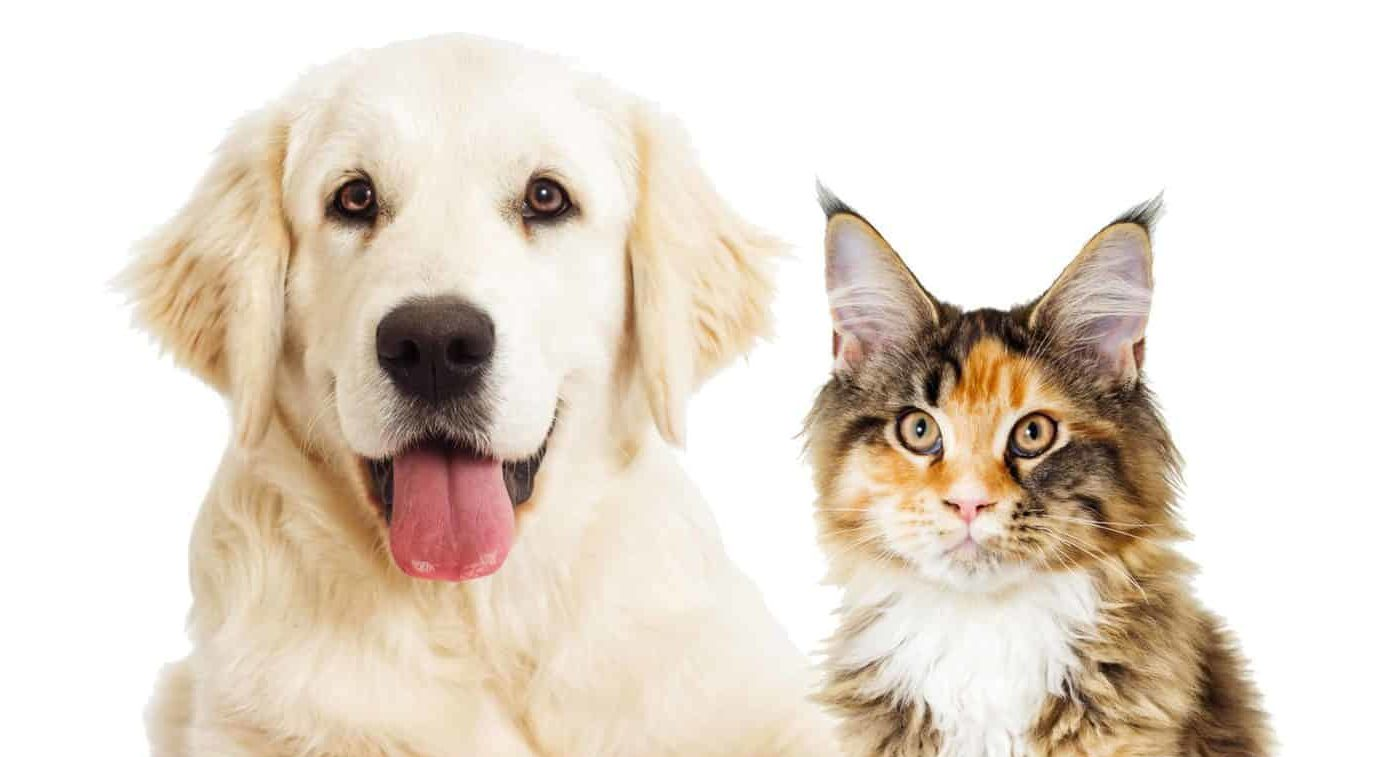

**Dataset Description: Dogs vs Cats Image Classification**

**1. Overview:**
   The dataset for the "Dogs vs Cats" image classification project is a collection of labeled images depicting dogs and cats. It is designed specifically for training machine learning models to distinguish between images of dogs and cats.

**2. Content:**
   The dataset contains a large number of images, with each image labeled as either a dog or a cat. The images vary in terms of breed, pose, background, lighting conditions, and image quality, reflecting the diverse range of appearances exhibited by dogs and cats in real-world scenarios.

**3. Distribution:**
   The dataset is typically divided into three subsets: training, validation, and testing. The training set comprises the majority of the images and is used to train the machine learning model. The validation set is used to evaluate the model's performance during training and tune hyperparameters, while the testing set is used to assess the model's generalization ability on unseen data.

**4. Size:**
   The dataset is usually substantial in size, consisting of 50000 images in total.

**5. Labeling:**
   Each image in the dataset is labeled as either belonging to the "dog" class or the "cat" class. These labels are essential for supervised learning, as they provide the ground truth information necessary for training the machine learning model to accurately classify images.

**6. Quality Control:**
   To ensure the reliability and consistency of the dataset, quality control measures may have been implemented during its creation. This could include manual inspection and verification of labels, as well as filtering out low-quality or irrelevant images that do not contribute to the task of distinguishing between dogs and cats.

**7. Data Augmentation:**
   In some versions of the dataset, data augmentation techniques may have been applied to increase the diversity and robustness of the training data. This could involve randomly applying transformations such as rotation, flipping, scaling, and cropping to the images, effectively generating additional training samples without collecting new data.

**8. Source:**
   The dataset may have been sourced from various sources, including online repositories, animal image databases, or crowdsourced collections. Proper attribution and citation of the dataset source are important considerations for ensuring ethical use and acknowledgment of the original data creators.

**9. Usage:**
   The dataset is intended for research and educational purposes, particularly in the field of computer vision and deep learning. It serves as a benchmark for evaluating the performance of machine learning models in the task of classifying images of dogs and cats, and it provides a valuable resource for studying and developing techniques for image classification and object recognition.

**10. Citation:**
   Depending on the specific version or source of the dataset used, appropriate citation guidelines should be followed to give credit to the creators and contributors of the dataset. This helps to promote transparency, reproducibility, and collaboration within the research community.

**Setting up Kaggle API Credentials in Google Colab**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Downloading Dogs vs Cats Dataset**

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 44.4MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.4MB/s]


**Extracting Dataset**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Importing TensorFlow and Keras Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**Creating Image Datasets from Directories for Training and Validation**

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalizing Image Data**

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Creating a Convolutional Neural Network (CNN) Model**

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

**Displaying Summary of the Model Architecture**

In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

**Compiling the Model with Adam Optimizer and Binary Crossentropy Loss**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Training the Model with Validation**

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.1847 - accuracy: 0.6065 - val_loss: 0.5913 - val_accuracy: 0.7008
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5511 - accuracy: 0.7218 - val_loss: 0.5087 - val_accuracy: 0.7456
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4688 - accuracy: 0.7793 - val_loss: 0.4945 - val_accuracy: 0.7544
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4150 - accuracy: 0.8120 - val_loss: 1.0117 - val_accuracy: 0.6208
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3429 - accuracy: 0.8498 - val_loss: 0.5598 - val_accuracy: 0.7342
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2729 - accuracy: 0.8842 - val_loss: 0.7226 - val_accuracy: 0.6804
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2054 - accuracy: 0.9165 - val_loss: 0.6816 - val_ac

**Plotting Training and Validation Accuracy**

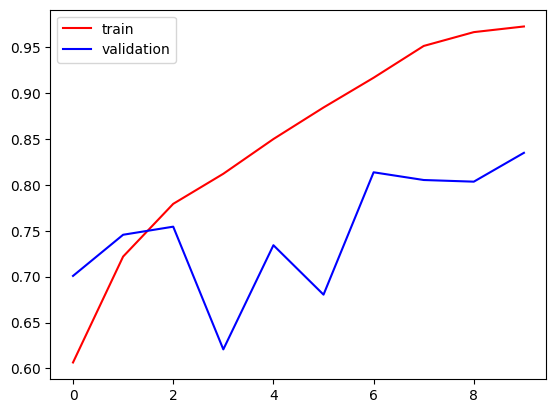

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**Plotting Training and Validation Loss**

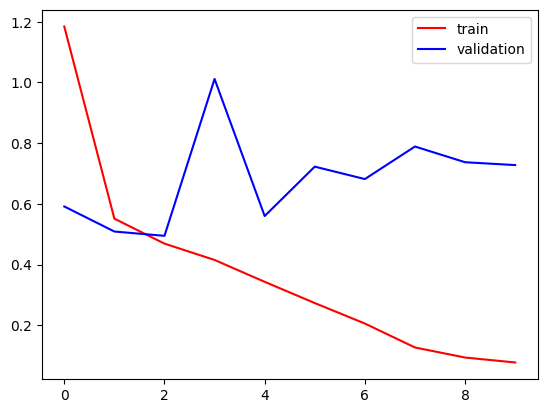

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

**Importing OpenCV Library**

In [ ]:
import cv2

**Reading an Image File into 'test_img' Variable**

In [ ]:
test_img = cv2.imread('/content/ajsdkhfkajsd.jpg')

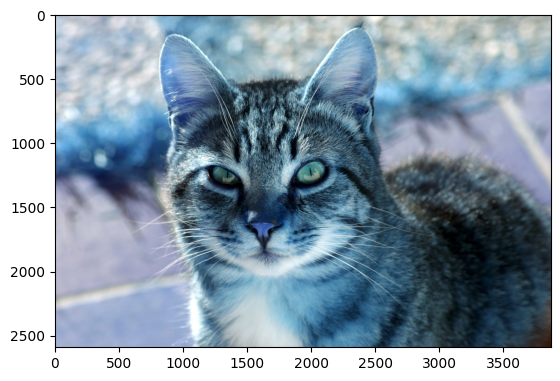

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2592, 3872, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

**Converting Numerical Prediction to Label**

In [ ]:
# Define a mapping between numerical outputs and labels
label_map = {0: 'Cat', 1: 'Dog'}

# Get the numerical prediction from model.predict(test_input)
numerical_prediction = model.predict(test_input)

# Convert numerical prediction to label
predicted_label = label_map[numerical_prediction[0][0]]

print(predicted_label)


1/1 [==============================] - 0s 105ms/step
Cat


In [ ]:
test_img = cv2.imread('/content/sdjhkjfdgjdf.jpg')

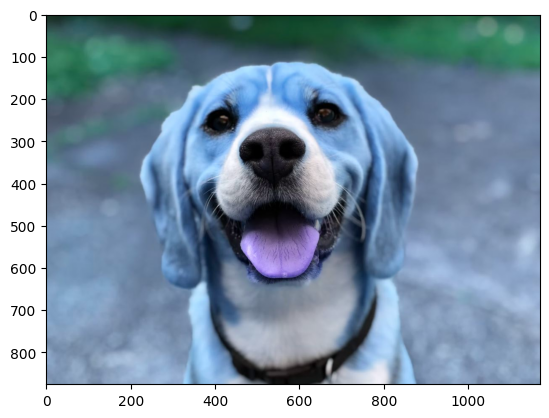

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(876, 1170, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
# Define a mapping between numerical outputs and labels
label_map = {0: 'Cat', 1: 'Dog'}

# Get the numerical prediction from model.predict(test_input)
numerical_prediction = model.predict(test_input)

# Convert numerical prediction to label
predicted_label = label_map[numerical_prediction[0][0]]

print(predicted_label)

1/1 [==============================] - 0s 20ms/step
Dog
